In [4]:
pip install biopython


In [0]:
import Bio

In [1]:
from Bio import SeqIO
for seq_record in SeqIO.parse('D:\GRCh38.primary_assembly.genome.fa', 'fasta'):
    if (seq_record.id == 'chr1'):
        my_seq_id = seq_record.id
        my_seq = (seq_record.seq)
        my_seq_len = len(seq_record)
        break

In [2]:
my_seq_id 

'chr1'

In [3]:
my_seq[0]

'N'

In [27]:
my_seq_len

248956422

In [6]:
import pandas as pd

In [28]:
col_index = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', \
            'signalValue', 'pValue', 'qValue', 'peak']
C1_narrowPeak = pd.read_csv('C1.csv', sep = '\t')

In [29]:
C1_narrowPeak.columns = col_index
chr1 = C1_narrowPeak[(C1_narrowPeak.chrom == 'chr1')]
chr1_start = list(chr1.iloc[:, 1])
chr1_end = list(chr1.iloc[:,2])

In [30]:
for i in range(len(chr1_start)):
    center = chr1_start[i] + (chr1_end[i] - chr1_start[i])//2
    chr1_start[i] = center - 250
    chr1_end[i] = center + 250

In [31]:
C1_chr1_dna_seqs = []
for start, end in zip(chr1_start, chr1_end):
    C1_chr1_dna_seqs.append(str(my_seq)[start: end])

In [32]:
C1_chr1_dna_seqs[0]

'TACTATAAAGCAACTCAGTATGGTCTGAACTATCAGAGAGCTACATGGAGAAATAGCTACTGCTAAACAGACCTCTCTGCTGATGTTTTTCCCAGCTACTTAAGTCCTGAAAATTTCCACAAGGCTGAGTCAAATCTGCGTTTCATCATCTATAAGAAAGGTACCTATCGAGAACACCCTGCTGGCCAGTGTGTAAATATCTAAAGGAGGACTCAGAAAACACCGGGGAAGTCCAGCCTGCACGTGGTGGCTGGGCTTCAGTGAAGCATGCAGCACAACAGGAGTTGTAAGTAGTAGTTACATCAGCAGCCCTGGAAATTCTGCTCAGAACCAAACTGAACAAATAACATTATCTAAGGCTTACAATTATTTAACTCCCTAAATTTTCTGTCCTCCCAGTAGCACTTTCAAATGCCTAAAAGCAATTAAAAGAAACATTTTTCCAATGTCTCACAGAACCATTAGAAACACAAAATTAATAGCTTCATAAACTATAGCTT'

In [33]:
C2_narrowPeak = pd.read_csv('C2.csv', sep = '\t')
C2_narrowPeak.columns = col_index
chr1 = C2_narrowPeak[(C2_narrowPeak.chrom == 'chr1')]
chr1_start = list(chr1.iloc[:, 1])
chr1_end = list(chr1.iloc[:,2])

In [34]:
for i in range(len(chr1_start)):
    center= chr1_start[i] + (chr1_end[i] - chr1_start[i])//2
    chr1_start[i] = center - 250
    chr1_end[i] = center + 250

In [35]:
C2_chr1_dna_seqs = []
for start, end in zip(chr1_start, chr1_end):
    C2_chr1_dna_seqs.append(str(my_seq)[start: end])

In [36]:
C2_chr1_dna_seqs[len(C2_chr1_dna_seqs)-1]

'TGCATAGGGAGTTTATTCATTCAATTAAGTTAAAACATTAGATAACATGGTAAATTCAAAAAGTAGCAAAGACACATTTTGTTTCTGTCTCTTTAACTGAGAAAACTGGTTGATGCCTCCTGTGTGTGAGCACCATGTAGCTGATGCAGATACAGAAACTGAGGTTTTCTTACTTGCTGCCACTGGCCCCGGCACTGGAGGTTGGCTCTGGGAGGGCAGGGTGTCTGTTTTTCTTACCACTCAGCAAGTGCCACACAAATATAAATGGGTGTCTCTGCCCTCTAGTGGATTCTGGCAGGCACTGGGAGCAAATGTGACTATAAAAAAAGTGAAAGATGTAAAAAATACACATTATCTCCAGAGGGGATTTAATTCTAACGGAGGGCTTTTTTTTTTCTTTTTCAAATGGGCTGATGGGTAAAAATGCAAGACTGGATATGTTGGAAAAAAGCACATTGCATTTGCCTTTTGGCATCTGTGATGACTGAGTCCTTCCTCAG'

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [50]:
chr1_dna_seqs = C1_chr1_dna_seqs + C2_chr1_dna_seqs
labels = [True]* len(C1_chr1_dna_seqs) + [False]* len(C2_chr1_dna_seqs)

In [61]:
dna_data = pd.DataFrame({'sequences': chr1_dna_seqs, 'label': labels})

In [62]:
dna_data.head()

,sequences,label
0,TACTATAAAGCAACTCAGTATGGTCTGAACTATCAGAGAGCTACAT...,True
1,CTGAGGCCGCGCGCGATAGGATGGGCGGACGGTGAAGAGAACTAGG...,True
2,TGGGAGCCACAGTGTGGAGAGAAACAGAAGAGGGAGGAGAGGGCGC...,True
3,GTGCCCCACAGCAGGACCACGAGCAGGGCCAAGGTGTCTCCAAGGT...,True
4,CGGGACAAGGCTGCTGGCCTGGAAGGTAGTCACGTGGAGAACCGCA...,True


In [53]:
letter_mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
def label_encode(seqs):
    return [letter_mapping[letter] for letter in seqs.strip()]

In [63]:
dna_data['sequence_list'] = dna_data['sequences'].apply(label_encode)
dna_data.head()

,sequences,label,sequence_list
0,TACTATAAAGCAACTCAGTATGGTCTGAACTATCAGAGAGCTACAT...,True,"[3, 0, 1, 3, 0, 3, 0, 0, 0, 2, 1, 0, 0, 1, 3, ..."
1,CTGAGGCCGCGCGCGATAGGATGGGCGGACGGTGAAGAGAACTAGG...,True,"[1, 3, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, ..."
2,TGGGAGCCACAGTGTGGAGAGAAACAGAAGAGGGAGGAGAGGGCGC...,True,"[3, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 3, 2, 3, ..."
3,GTGCCCCACAGCAGGACCACGAGCAGGGCCAAGGTGTCTCCAAGGT...,True,"[2, 3, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, ..."
4,CGGGACAAGGCTGCTGGCCTGGAAGGTAGTCACGTGGAGAACCGCA...,True,"[1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 3, 2, 1, 3, ..."


In [55]:
import numpy as np

In [64]:
sequence_list = np.array(dna_data['sequence_list'].values.tolist())

In [65]:
onehot_encoder = OneHotEncoder(sparse = False)
sequence_encoded = onehot_encoder.fit_transform(sequence_list)

In [66]:
dna_data['sequence_encoded'] = sequence_encoded.tolist()

In [67]:
dna_data = dna_data.sample(frac = 1, replace = False, axis = 0)
dna_data.head()

,sequences,label,sequence_list,sequence_encoded
8830,CTAATTGATGTTCAGCTGCAGTGAGACACAGCCACCTGTGCGTCCA...,True,"[1, 3, 0, 0, 3, 3, 2, 0, 3, 2, 3, 3, 1, 0, 2, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
23207,CAGAGTTCACGATGAGATAAGTCTAAAAGAACGTAACATAACTGTC...,False,"[1, 0, 2, 0, 2, 3, 3, 1, 0, 1, 2, 0, 3, 2, 0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
11244,GCCTCGCTGACCTTATGATTCAATGAAGGAATTGGAGAAATAAGCA...,True,"[2, 1, 1, 3, 1, 2, 1, 3, 2, 0, 1, 1, 3, 3, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
20786,GGCACAGGAAGCTCCTGGAAAACTGAATAAAAACAAATGCTCAGAG...,False,"[2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 3, 1, 1, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
621,TTTCATCTCCCCCGGGGGATGTCTCTCTTGTTCCTCCCCTGACATT...,True,"[3, 3, 3, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [68]:
dna_data = dna_data.drop(['sequences', 'sequence_list'], axis = 1)
dna_data.head()

,label,sequence_encoded
8830,True,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
23207,False,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
11244,True,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
20786,False,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
621,True,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [69]:
labels = dna_data['label'].values
labels

array([ True, False,  True, ...,  True,  True,  True])

In [70]:
sequence_encoded.shape

(29132, 2000)

In [71]:
sequence_encoded = sequence_encoded.reshape(len(sequence_encoded), 1, 500, 4)

In [72]:
sequence_encoded.shape

(29132, 1, 500, 4)

In [73]:
labels.reshape(29132, 1)
labels

array([ True, False,  True, ...,  True,  True,  True])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequence_encoded, labels, 
                                test_size = 0.1)

In [76]:
y_train.shape, y_test.shape

((26218,), (2914,))

In [77]:
y_train.reshape(26218, 1).shape, y_test.reshape(2914,1).shape

((26218, 1), (2914, 1))

In [78]:
X_train.shape

(26218, 1, 500, 4)

In [79]:
import tensorflow as tf

In [81]:
#To prepare for model training, we import the necessary functions and submodules from keras
from keras.models import Sequential
from keras.layers.core import Dropout, Reshape, Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta, SGD, RMSprop;
import keras.losses;
from keras.constraints import maxnorm;
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping, History
from keras import backend as K 
K.set_image_data_format('channels_last')

Using TensorFlow backend.


In [87]:
model = Sequential()

In [88]:
model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))

model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))

model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (1, 35)))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 500, 15)        615       
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 500, 15)        60        
_________________________________________________________________
activation_5 (Activation)    (None, 1, 500, 15)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 500, 15)        2265      
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 500, 15)        60        
_________________________________________________________________
activation_6 (Activation)    (None, 1, 500, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 500, 15)       

In [90]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
model_train = model.fit(x=X_train, y=y_train, batch_size = 128, epochs = 10,
                                  validation_split=0.1)

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Train on 23596 samples, validate on 2622 samples
Epoch 1/10
23596/23596 [==============================] - 57s 2ms/step - loss: 0.7373 - accuracy: 0.5375 - val_loss: 0.7114 - val_accuracy: 0.4809
Epoch 2/10
23596/23596 [==============================] - 66s 3ms/step - loss: 0.6849 - accuracy: 0.5741 - val_loss: 0.7093 - val_accuracy: 0.5278
Epoch 3/10
23596/23596 [==============================] - 70s 3ms/step - loss: 0.6678 - accuracy: 0.5957 - val_loss: 0.7256 - val_accuracy: 0.5683
Epoch 4/10
23596/23596 [==============================] - 76s 3ms/step - loss: 0.6587 - accuracy: 0.6098 - val_loss: 0.7124 - val_accuracy: 0.5454
Epoch 5/10
23596/23596 [==============================] - 73s 3ms/step - loss: 0.6470 - accuracy: 0.6225 - val_loss: 0.7255 - val_accuracy: 0.4962
Epoch 6/10
23596/23596 [==============================] - 77s 3ms/step - loss: 0.6426 - accuracy: 0.6281 - val_loss: 0.7133 - val_accuracy: 0.5477
Epoch 7/10
23596/23596 [==============================] - 73s 3ms/ste

In [92]:
test_eval = model.evaluate(X_test, y_test, verbose = 1)
print('Total loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

2914/2914 [==============================] - 2s 607us/step
Total loss:  0.7201011433696288
Test accuracy:  0.559711754322052


In [96]:
dropout_model = Sequential()
dropout_model.add(Conv2D(filters = 10, kernel_size = (1, 15), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))

dropout_model.add(Conv2D(filters = 10, kernel_size = (1, 15), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))

dropout_model.add(Conv2D(filters = 10, kernel_size = (1, 15), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))


dropout_model.add(Conv2D(filters = 10, kernel_size = (1, 15), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))

dropout_model.add(MaxPooling2D(pool_size = (1, 35)))

dropout_model.add(Flatten())
dropout_model.add(Dense(1))
dropout_model.add(Activation('sigmoid'))

In [97]:
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
train = dropout_model.fit(x=X_train, y=y_train, batch_size = 128, epochs = 10, validation_split=0.1)

Train on 23596 samples, validate on 2622 samples
Epoch 1/10
23596/23596 [==============================] - 73s 3ms/step - loss: 0.7949 - accuracy: 0.5270 - val_loss: 0.6863 - val_accuracy: 0.5492
Epoch 2/10
23596/23596 [==============================] - 76s 3ms/step - loss: 0.7480 - accuracy: 0.5326 - val_loss: 0.6885 - val_accuracy: 0.5427
Epoch 3/10
23596/23596 [==============================] - 80s 3ms/step - loss: 0.7329 - accuracy: 0.5325 - val_loss: 0.6836 - val_accuracy: 0.5625
Epoch 4/10
23596/23596 [==============================] - 83s 4ms/step - loss: 0.7134 - accuracy: 0.5450 - val_loss: 0.6846 - val_accuracy: 0.5751
Epoch 5/10
23596/23596 [==============================] - 81s 3ms/step - loss: 0.6964 - accuracy: 0.5559 - val_loss: 0.6847 - val_accuracy: 0.5675
Epoch 6/10
23596/23596 [==============================] - 80s 3ms/step - loss: 0.6863 - accuracy: 0.5713 - val_loss: 0.6817 - val_accuracy: 0.5732
Epoch 7/10
23596/23596 [==============================] - 80s 3ms/ste

In [100]:
test_eval = dropout_model.evaluate(X_test, y_test, verbose = 1)
print('Total loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

2914/2914 [==============================] - 2s 730us/step
Total loss:  0.6805954639766015
Test accuracy:  0.5823610424995422


In [101]:
dropout_model = Sequential()
dropout_model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))

dropout_model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))

dropout_model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))


dropout_model.add(Conv2D(filters = 15, kernel_size = (1, 10), padding = "same", input_shape = sequence_encoded.shape[1::]))
dropout_model.add(BatchNormalization(axis=-1))
dropout_model.add(Activation("relu"))
dropout_model.add(Dropout(0.25))

dropout_model.add(MaxPooling2D(pool_size = (1, 35)))

dropout_model.add(Flatten())
dropout_model.add(Dense(1))
dropout_model.add(Activation('sigmoid'))

In [102]:
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train = dropout_model.fit(x=X_train, y=y_train, batch_size = 128, epochs = 10,
                                  validation_split=0.1)

Train on 23596 samples, validate on 2622 samples
Epoch 1/10
23596/23596 [==============================] - 86s 4ms/step - loss: 0.7857 - accuracy: 0.5290 - val_loss: 0.6997 - val_accuracy: 0.4981
Epoch 2/10
23596/23596 [==============================] - 103s 4ms/step - loss: 0.7452 - accuracy: 0.5344 - val_loss: 0.6924 - val_accuracy: 0.5359
Epoch 3/10
23596/23596 [==============================] - 101s 4ms/step - loss: 0.7234 - accuracy: 0.5379 - val_loss: 0.6963 - val_accuracy: 0.5050
Epoch 4/10
23596/23596 [==============================] - 96s 4ms/step - loss: 0.6980 - accuracy: 0.5569 - val_loss: 0.6857 - val_accuracy: 0.5725
Epoch 5/10
23596/23596 [==============================] - 99s 4ms/step - loss: 0.6854 - accuracy: 0.5719 - val_loss: 0.6879 - val_accuracy: 0.5637
Epoch 6/10
23596/23596 [==============================] - 107s 5ms/step - loss: 0.6829 - accuracy: 0.5778 - val_loss: 0.6842 - val_accuracy: 0.5797
Epoch 7/10
23596/23596 [==============================] - 105s 4ms

In [103]:
test_eval = dropout_model.evaluate(X_test, y_test, verbose = 1)
print('Total loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

2914/2914 [==============================] - 4s 1ms/step
Total loss:  0.6842698735084612
Test accuracy:  0.5813314914703369


In [0]:
!pip install dragonn>=0.2.7

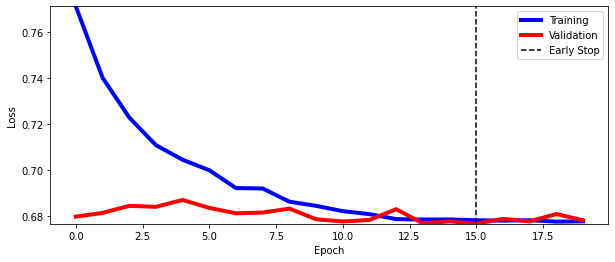

In [99]:
from dragonn.vis import *

plot_learning_curve(train)
